In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Exercise 1

In [154]:
data = pd.read_csv('./data_for_18/flight_delays.csv')
data['Month'] = data['Month'].str[2:].values.astype(int)
data['DayofMonth'] = data['DayofMonth'].str[2:].values.astype(int)
data['DayOfWeek'] = data['DayOfWeek'].str[2:].values.astype(int)
data

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,8,21,7,1934,AA,ATL,DFW,732,N
1,4,20,3,1548,US,PIT,MCO,834,N
2,9,2,5,1422,XE,RDU,CLE,416,N
3,11,25,6,1015,OO,DEN,MEM,872,N
4,10,7,6,1828,WN,MDW,OMA,423,Y
...,...,...,...,...,...,...,...,...,...
99995,5,4,3,1618,OO,SFO,RDD,199,N
99996,1,18,3,804,CO,EWR,DAB,884,N
99997,1,24,2,1901,NW,DTW,IAH,1076,N
99998,4,27,4,1515,MQ,DFW,GGG,140,N


## 1

Text(-1.3, 1.6, 'Share of all delays to all departures =  0.019')

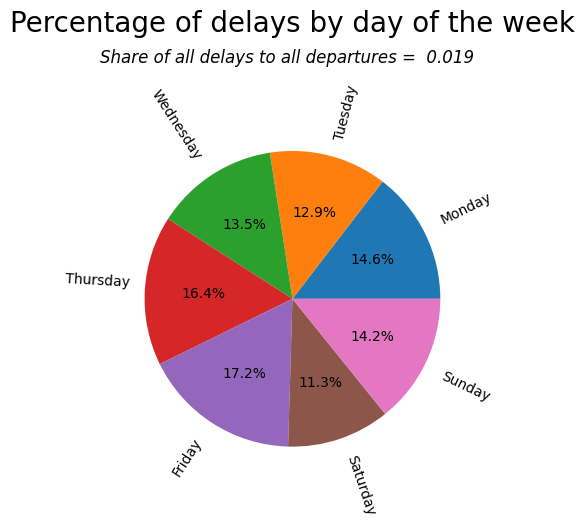

In [155]:
data['delayed_bool'] = data['dep_delayed_15min'] == 'Y'
prev1 = data.groupby('DayOfWeek')['delayed_bool']
prop_delays_per_dayofweek = prev1.sum()
prop_all_delays = prev1.sum().sum() / data.size

dayofweek_dict_labels = np.array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
labels = dayofweek_dict_labels[np.array(prop_delays_per_dayofweek.index) - 1]

plt.title('Percentage of delays by day of the week', x=0.5, y=1.2, fontsize=20)
plt.pie(prop_delays_per_dayofweek, labels=labels, autopct='%1.1f%%', rotatelabels=True)
plt.text(x=-1.3, y=1.6, s=f'Share of all delays to all departures = {prop_all_delays: .3f}',  fontsize=12, fontstyle='italic')

## 2

Text(0, 0.5, 'Num of delays')

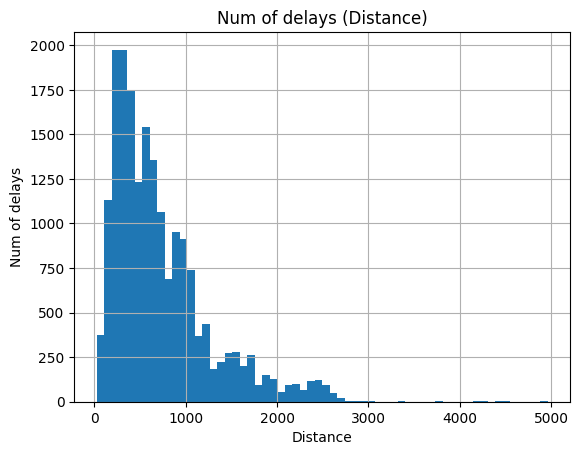

In [192]:
ax2 = data[data['delayed_bool']]['Distance'].hist(bins=60)
ax2.set_title('Num of delays (Distance)')
ax2.set_xlabel('Distance')
ax2.set_ylabel('Num of delays')

## 3

<AxesSubplot: title={'center': 'Num of delays (Dest)'}, xlabel='Dest', ylabel='Num of delays'>

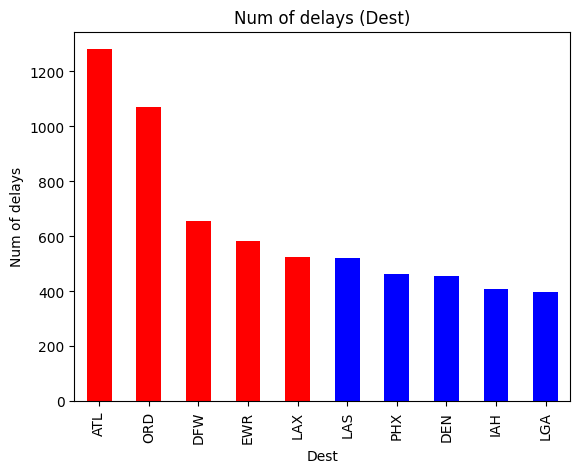

In [202]:
data.groupby('Dest')['delayed_bool'].sum().sort_values(ascending=False)[:10].plot.bar(title='Num of delays (Dest)', ylabel='Num of delays', color=(['r']*5+['b']*5))

## 4

Text(0.5, 1.0, 'Frequency of delays per season')

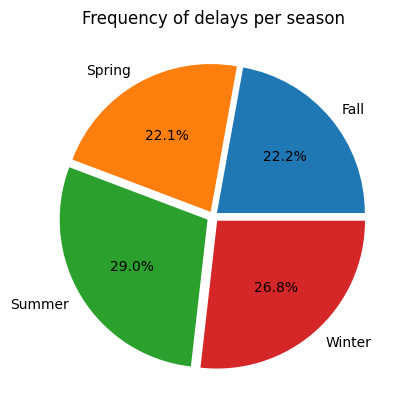

In [385]:
season_labels = np.array(['Winter', 'Spring', 'Summer', 'Fall'])

data['Season'] = season_labels[((data['Month'] )%12 // 3).values]

freq_per_season = data.groupby('Season')['delayed_bool'].mean()
ax4 = freq_per_season.plot.pie(autopct='%1.1f%%', explode=freq_per_season/5)
ax4.set_ylabel('')
ax4.set_title('Frequency of delays per season')

## 5

<AxesSubplot: title={'center': 'Top 10 best carriers'}, xlabel='UniqueCarrier', ylabel='Delay freq'>

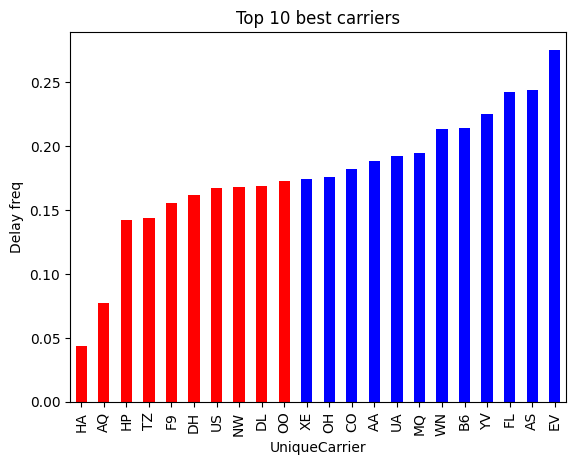

In [386]:
freq_for_carrier = data.groupby('UniqueCarrier')['delayed_bool'].mean()
freq_for_carrier.sort_values().plot.bar(title='Top 10 best carriers', ylabel='Delay freq', color=(['r']*10+['b']*100))

## 6

<AxesSubplot: title={'center': 'Top 10 worst airports'}, xlabel='Origin', ylabel='Delay freq'>

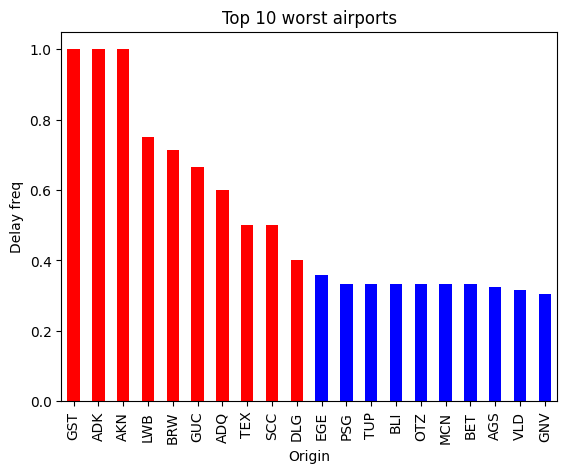

In [387]:
freq_for_airport = data.groupby('Origin')['delayed_bool'].mean()
freq_for_airport.sort_values(ascending=False)[:20].plot.bar(title='Top 10 worst airports', ylabel='Delay freq', color=(['r']*10+['b']*10))

## 7

Text(0, 0.5, 'Delays freq')

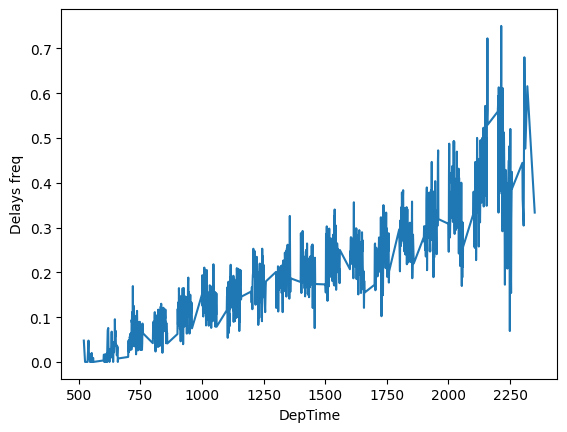

In [422]:
prev7 = data.groupby('DepTime')['delayed_bool']
mask7 = prev7.size().values > 20
prev7.mean()[mask7].plot()
plt.ylabel('Delays freq')

I don't know how the departure time is calculated, but it seems that the later the departure, the more often it is delayed.
it's strange, because of the cycle of the day, but maybe workers get tired in the evening..........

In [424]:
from scipy.stats import spearmanr

spearmanr(prev7.mean()[mask7].index, prev7.mean()[mask7].values)

SpearmanrResult(correlation=0.9189503488734884, pvalue=0.0)

p-value=0 $\approx$ correlation

# Exercise 3

Text(0, 0.5, 'Height')

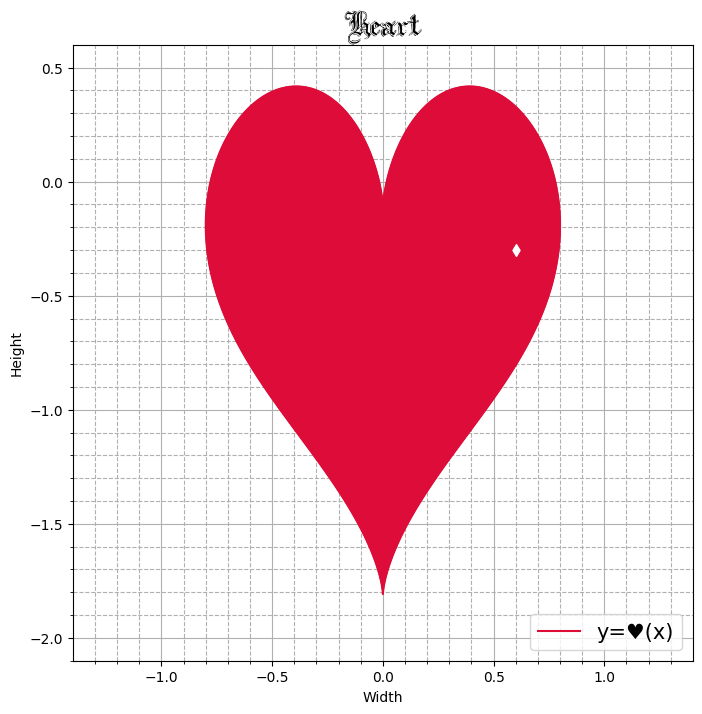

In [6]:
t3 = np.linspace(0, 2*np.pi, 1000)
x3 = ( 16*(np.sin(t3)**3) )/20
y3 = ( 13*np.cos(t3) - 5*np.cos(2*t3) - 2*np.cos(3*t3) - np.cos(4*t3) )/13 - 0.5

point3 = (0.6, -0.3)

fig3 = plt.figure(figsize=(8, 8))
ax3 = fig3.add_subplot(autoscale_on=False)

ax3.minorticks_on()
ax3.grid(which='minor', linestyle='--', zorder=0)
ax3.grid(which='major', zorder=1)

ax3.plot(x3, y3, color='#dd0c39', zorder=2, label='y=♥(x)')
ax3.fill(x3, y3, color='#dd0c39', zorder=2)
ax3.scatter(point3[0], point3[1], zorder=3, color='white', marker='d')

ax3.set_xlim(-1.4, 1.4)
ax3.set_ylim(-2.1, 0.6)

ax3.set_title('Heart', fontname='Argor Got Scaqh', fontsize=18)
ax3.legend(loc='lower right', fontsize=15)
ax3.set_xlabel('Width')
ax3.set_ylabel('Height')